# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "IPSL-CM5A-MR"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/huss_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 3.880413055419922 to load the data
*********Start to merge*********
It takes elapsed_time 0.05199599266052246 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_143x144_192x288_peri.nc
It takes elapsed_time 14.816128015518188 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.109899759292603 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6660797595977783 to mask the layer
*********Start to plot the layer*********


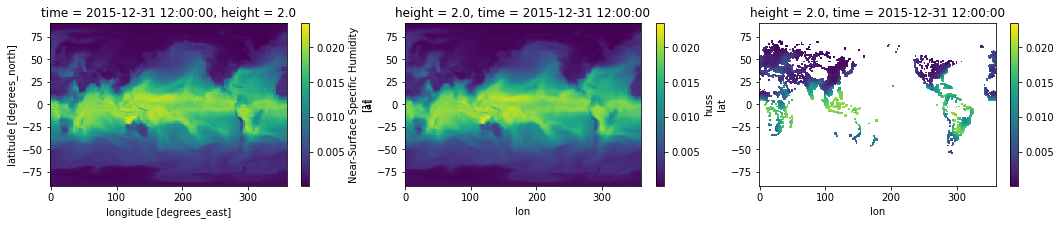

It takes elapsed_time 0.7146615982055664 to plot the layer
It takes elapsed_time 29.240067958831787 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/tas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 6.806695461273193 to load the data
*********Start to merge*********
It takes elapsed_time 0.05365252494812012 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.025483369827270508 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.00254774093628 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.690373420715332 to mask the layer
*********Start to plot the layer*********


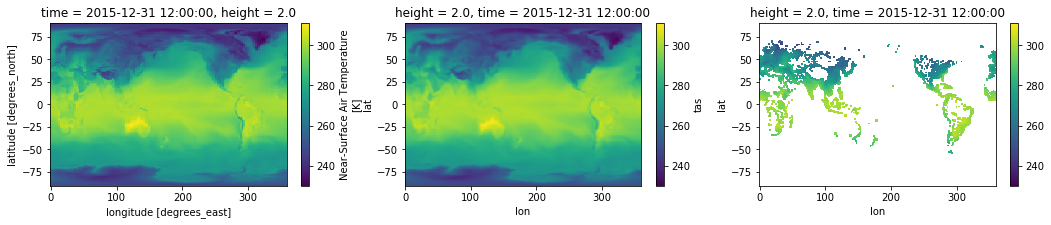

It takes elapsed_time 0.7175955772399902 to plot the layer
It takes elapsed_time 17.297423839569092 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/uas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 6.075623989105225 to load the data
*********Start to merge*********
It takes elapsed_time 0.05255746841430664 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.030091524124145508 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.01913857460022 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6576259136199951 to mask the layer
*********Start to plot the layer*********


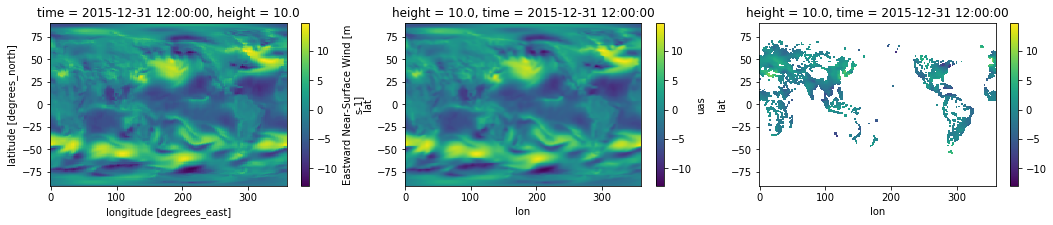

It takes elapsed_time 0.7199239730834961 to plot the layer
It takes elapsed_time 16.556150436401367 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/vas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 7.461087465286255 to load the data
*********Start to merge*********
It takes elapsed_time 0.06215071678161621 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.025354862213134766 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.041881084442139 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6618835926055908 to mask the layer
*********Start to plot the layer*********


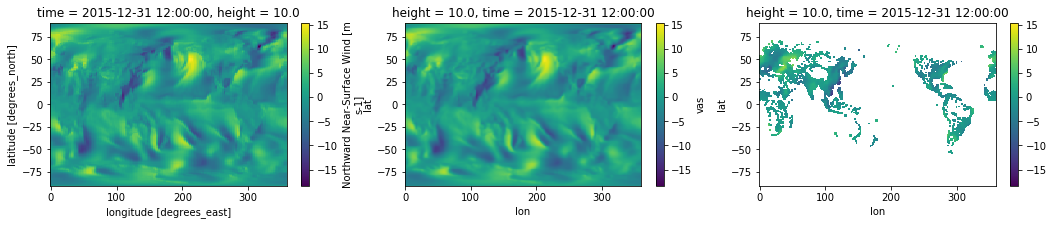

It takes elapsed_time 0.7179868221282959 to plot the layer
It takes elapsed_time 17.971184492111206 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/pr_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 6.62670373916626 to load the data
*********Start to merge*********
It takes elapsed_time 0.05895853042602539 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.025392532348632812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.059101581573486 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6594133377075195 to mask the layer
*********Start to plot the layer*********


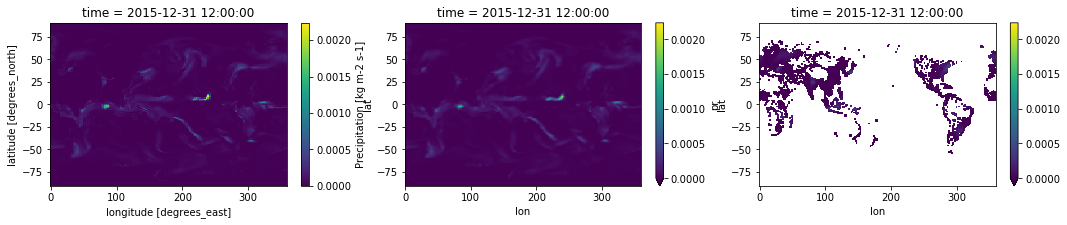

It takes elapsed_time 0.6501665115356445 to plot the layer
It takes elapsed_time 17.080665349960327 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/prsn_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 4.752786874771118 to load the data
*********Start to merge*********
It takes elapsed_time 0.05814719200134277 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.02506566047668457 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.05366039276123 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6571094989776611 to mask the layer
*********Start to plot the layer*********


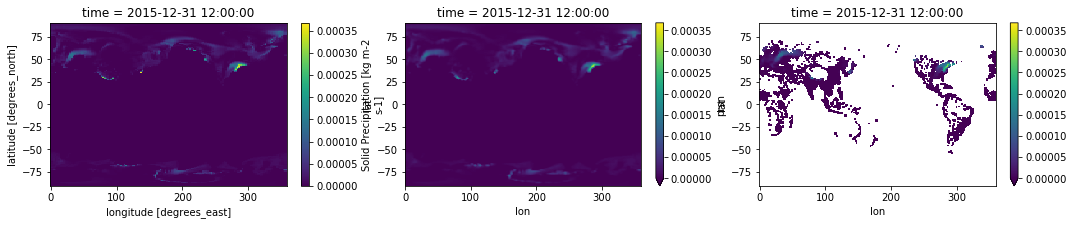

It takes elapsed_time 0.671795129776001 to plot the layer
It takes elapsed_time 15.219800472259521 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rlds_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 4.883076429367065 to load the data
*********Start to merge*********
It takes elapsed_time 0.054650068283081055 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.025623321533203125 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.056098699569702 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6616251468658447 to mask the layer
*********Start to plot the layer*********


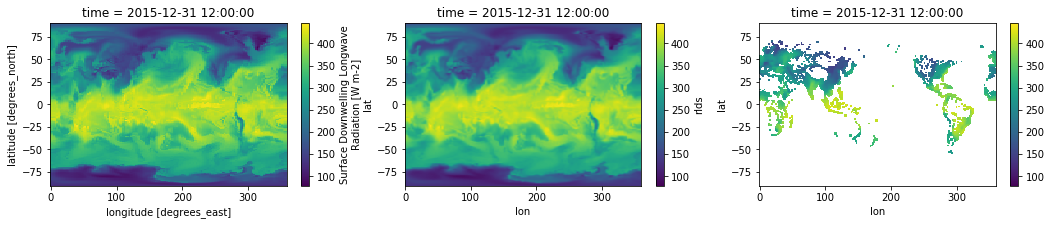

It takes elapsed_time 0.7057778835296631 to plot the layer
It takes elapsed_time 15.387725830078125 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rlus_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 4.33198094367981 to load the data
*********Start to merge*********
It takes elapsed_time 0.054576873779296875 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.024698257446289062 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.02828311920166 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6605563163757324 to mask the layer
*********Start to plot the layer*********


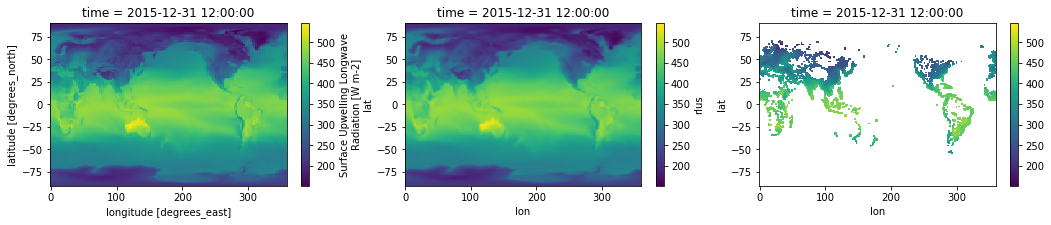

It takes elapsed_time 0.7177565097808838 to plot the layer
It takes elapsed_time 14.818771362304688 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rsds_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 5.003775119781494 to load the data
*********Start to merge*********
It takes elapsed_time 0.06268692016601562 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.026864290237426758 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.080311059951782 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6726148128509521 to mask the layer
*********Start to plot the layer*********


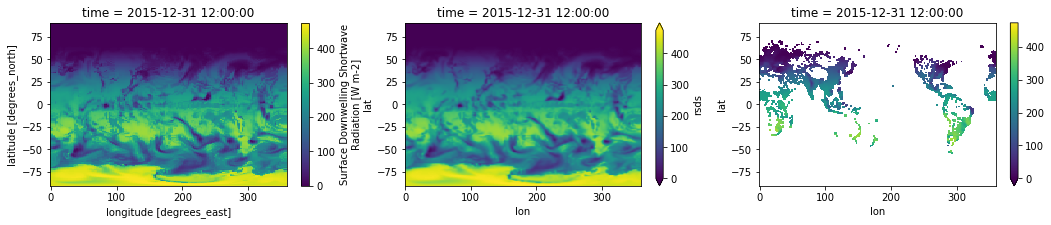

It takes elapsed_time 0.7269704341888428 to plot the layer
It takes elapsed_time 15.574493408203125 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rsus_day_IPSL-CM5A-MR_rcp85_r1i1p1_20060101-20551231.nc
It takes elapsed_time 4.7567524909973145 to load the data
*********Start to merge*********
It takes elapsed_time 0.05750417709350586 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.026238441467285156 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.119137287139893 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6776549816131592 to mask the layer
*********Start to plot the layer*********


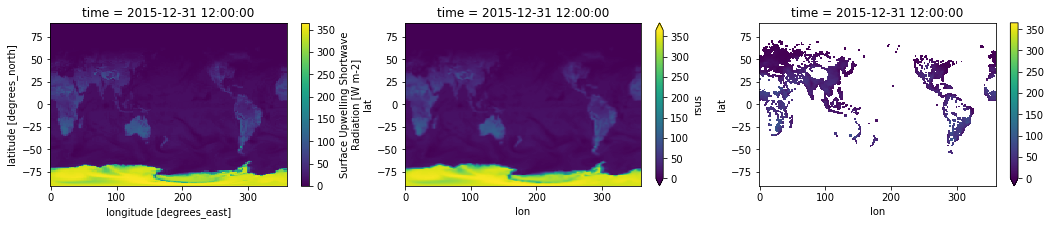

It takes elapsed_time 0.7474737167358398 to plot the layer
It takes elapsed_time 15.38553524017334 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2056, 50)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 31.574668645858765 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

257.36740231513977


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/huss_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 3.708503246307373 to load the data
*********Start to merge*********
It takes elapsed_time 0.04881548881530762 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.02570033073425293 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.04128122329712 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6609165668487549 to mask the layer
*********Start to plot the layer*********


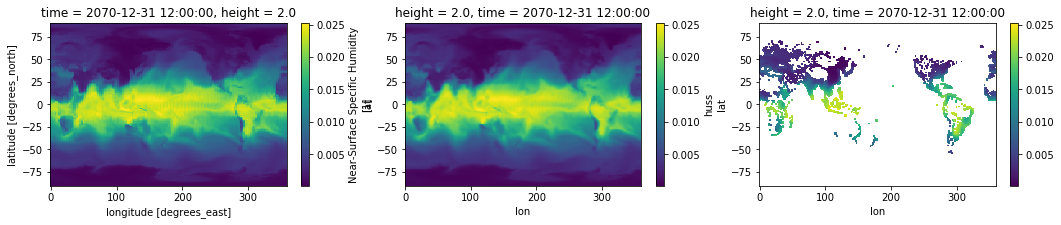

It takes elapsed_time 0.7346374988555908 to plot the layer
It takes elapsed_time 14.220786571502686 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/tas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 6.963895320892334 to load the data
*********Start to merge*********
It takes elapsed_time 0.05616879463195801 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.025838851928710938 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.060180425643921 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.7151453495025635 to mask the layer
*********Start to plot the layer*********


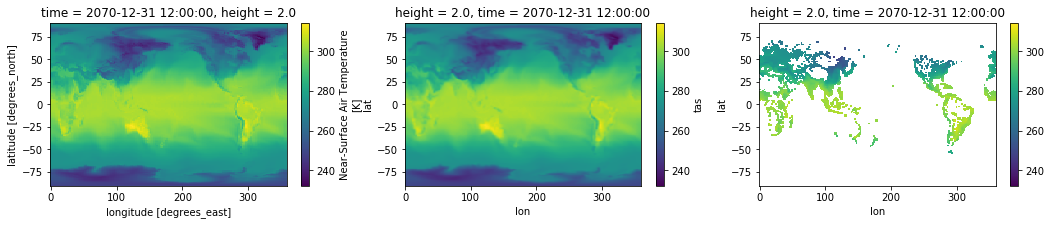

It takes elapsed_time 0.7463736534118652 to plot the layer
It takes elapsed_time 17.568334817886353 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/uas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 5.989977598190308 to load the data
*********Start to merge*********
It takes elapsed_time 0.08813619613647461 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.028853416442871094 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.198003768920898 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6820569038391113 to mask the layer
*********Start to plot the layer*********


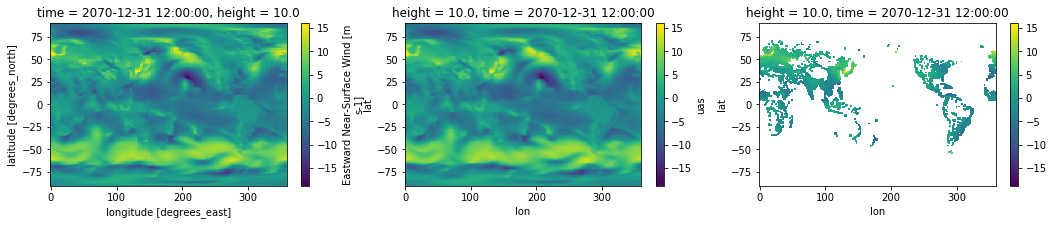

It takes elapsed_time 0.7597322463989258 to plot the layer
It takes elapsed_time 16.74864935874939 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/vas_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 7.44638204574585 to load the data
*********Start to merge*********
It takes elapsed_time 0.06880354881286621 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.13497519493103027 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.023118734359741 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6647739410400391 to mask the layer
*********Start to plot the layer*********


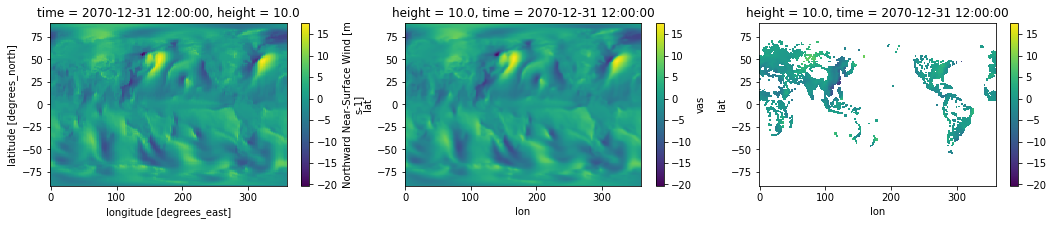

It takes elapsed_time 0.7426834106445312 to plot the layer
It takes elapsed_time 18.08174729347229 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/pr_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 6.684374809265137 to load the data
*********Start to merge*********
It takes elapsed_time 0.06340479850769043 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.059049129486083984 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.117729902267456 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6614096164703369 to mask the layer
*********Start to plot the layer*********


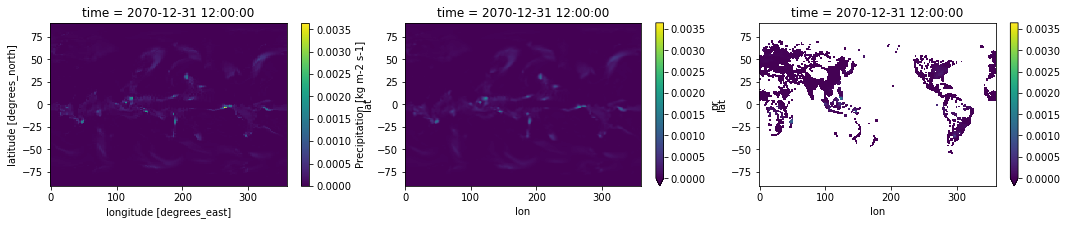

It takes elapsed_time 0.6919229030609131 to plot the layer
It takes elapsed_time 17.278807163238525 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/prsn_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 4.995996713638306 to load the data
*********Start to merge*********
It takes elapsed_time 0.051502227783203125 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.07408428192138672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.046940088272095 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6987485885620117 to mask the layer
*********Start to plot the layer*********


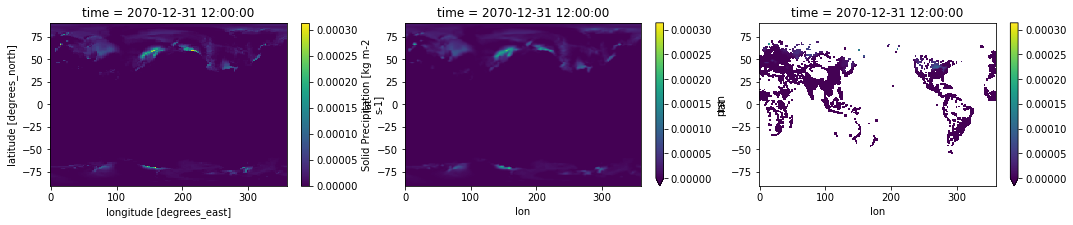

It takes elapsed_time 0.6946618556976318 to plot the layer
It takes elapsed_time 15.563352823257446 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rlds_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 5.83289361000061 to load the data
*********Start to merge*********
It takes elapsed_time 0.056912899017333984 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.0599210262298584 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.091077327728271 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.665003776550293 to mask the layer
*********Start to plot the layer*********


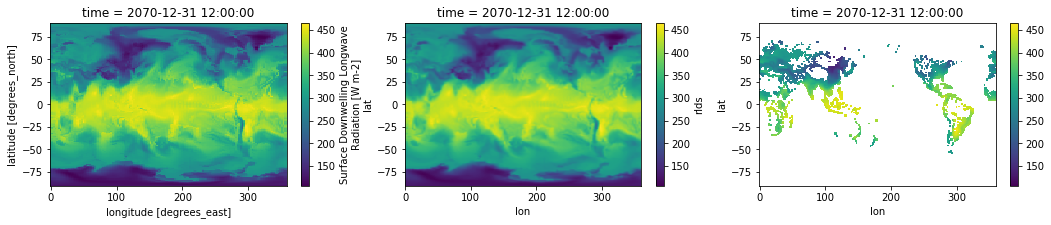

It takes elapsed_time 0.7424027919769287 to plot the layer
It takes elapsed_time 16.449532747268677 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rlus_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 4.969026327133179 to load the data
*********Start to merge*********
It takes elapsed_time 0.06009984016418457 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.07983088493347168 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.118688344955444 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.7091374397277832 to mask the layer
*********Start to plot the layer*********


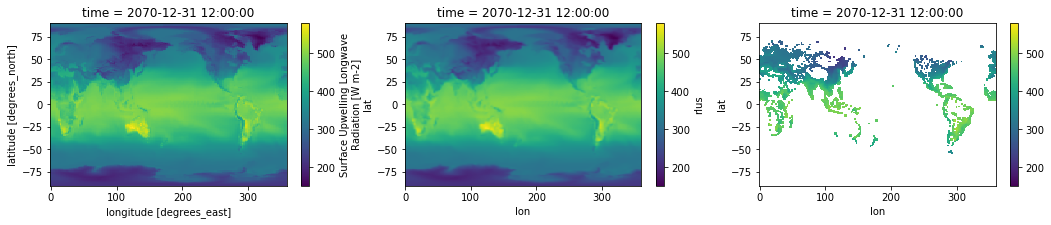

It takes elapsed_time 0.6921234130859375 to plot the layer
It takes elapsed_time 15.63027310371399 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rsds_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 5.463260173797607 to load the data
*********Start to merge*********
It takes elapsed_time 0.06073284149169922 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.2145977020263672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.19232964515686 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6799185276031494 to mask the layer
*********Start to plot the layer*********


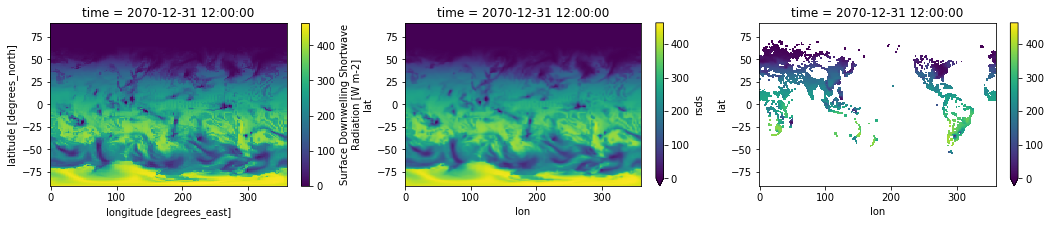

It takes elapsed_time 0.7296507358551025 to plot the layer
It takes elapsed_time 16.341603755950928 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/IPSL-CM5A-MR/rsus_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc
It takes elapsed_time 4.583752632141113 to load the data
*********Start to merge*********
It takes elapsed_time 0.05885171890258789 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_143x144_192x288_peri.nc
It takes elapsed_time 0.06438684463500977 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.105457782745361 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6785154342651367 to mask the layer
*********Start to plot the layer*********


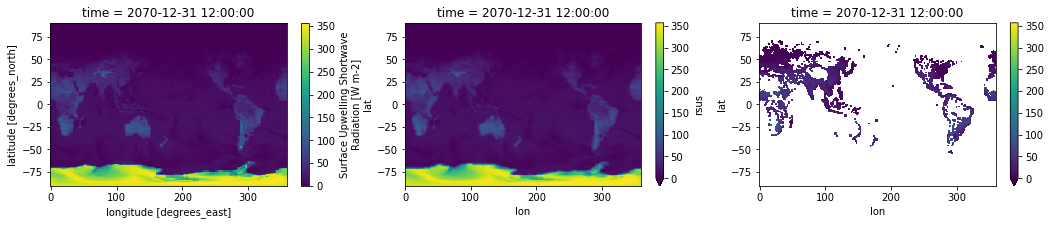

It takes elapsed_time 0.6994307041168213 to plot the layer
It takes elapsed_time 15.19159746170044 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2056, 2101, 45)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 33.322168588638306 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

254.28781032562256
